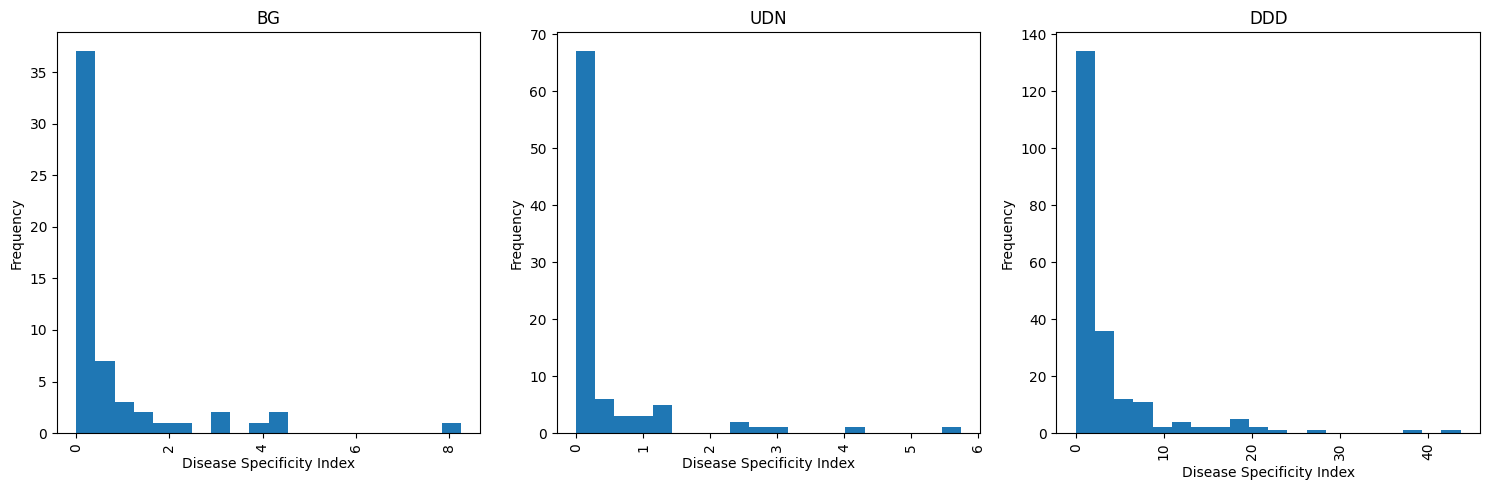

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the tab-delimited files
file_path1 = '/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/BG_HPO_ranks_dsi.txt'
file_path2 = '/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/UDN_HPO_ranks_dsi.txt'
file_path3 = '/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/DDD_HPO_ranks_dsi.txt'

data1 = pd.read_csv(file_path1, delimiter='\t', header=None, names=['ID', 'DSI', 'nHPOs', 'gdd'])
data2 = pd.read_csv(file_path2, delimiter='\t', header=None, names=['ID', 'DSI', 'nHPOs', 'gdd'])
data3 = pd.read_csv(file_path3, delimiter='\t', header=None, names=['ID', 'DSI', 'nHPOs', 'gdd'])

# Remove values np.nan
data1 = data1[data1.iloc[:, 1] != 'np.nan']
data2 = data2[data2.iloc[:, 1] != 'np.nan']
data3 = data3[data3.iloc[:, 1] != 'np.nan']
# Change inf values in second column to 100
data1.iloc[:, 1] = data1.iloc[:, 1].replace('inf', 10)
data2.iloc[:, 1] = data2.iloc[:, 1].replace('inf', 10)
data3.iloc[:, 1] = data3.iloc[:, 1].replace(np.inf, 10)

# Convert second column to float
data1.iloc[:, 1] = data1.iloc[:, 1].astype(float)
data2.iloc[:, 1] = data2.iloc[:, 1].astype(float)
data3.iloc[:, 1] = data3.iloc[:, 1].astype(float)

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for data1
axs[0].hist(data1.iloc[:, 1], bins=20)
axs[0].set_xlabel('Disease Specificity Index')
axs[0].set_ylabel('Frequency')
axs[0].set_title('BG')

# Plot histogram for data2
axs[1].hist(data2.iloc[:, 1], bins=20)
axs[1].set_xlabel('Disease Specificity Index')
axs[1].set_ylabel('Frequency')
axs[1].set_title('UDN')

# Plot histogram for data3
axs[2].hist(data3.iloc[:, 1], bins=20)
axs[2].set_xlabel('Disease Specificity Index')
axs[2].set_ylabel('Frequency')
axs[2].set_title('DDD')

# Set the number of x ticks and rotate labels for all subplots
for ax in axs:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


The overall Low section Score, (LsS, Equation (2)) is calculated using the following:

𝐿𝑠𝑆=∑𝐿=1𝐿𝑚𝑎𝑥𝑑𝐿∗(𝐿𝑚𝑎𝑥−𝐿+1),if𝑑𝐿>0𝐿𝑆<br>
This shows that the 𝑑𝐿 scores for the Low section of the ontology are weighted, where the weights are assigned inversely to the level of the ontology. 𝐿𝑚𝑎𝑥 is the level with the highest number of terms in the ontology. The weights serve to penalize very unspecific terms in the cohort dataset. 𝐿𝑆 is the number of levels present in the ontology section.

The overall High section Score (HsS, Equation (3)) is calculated using the following:

𝐻𝑠𝑆=∑𝐿=𝐿𝑚𝑎𝑥+1𝐿𝑜(𝑑𝐿∗(𝐿𝑜−𝐿)),if𝑑𝐿>0𝐿𝑆<br>
This shows that the 𝑑𝐿 scores for the High section of the ontology are weighted, where each level is weighted in proportion to its depth with respect to 𝐿𝑚𝑎𝑥. The weights serve to reward very specific terms in the cohort dataset. 𝐿𝑜 is the deepest possible level in the ontology.

The Dataset specificity Index is the ratio between both section scores (Equation (4)):

𝐷𝑠𝐼=𝐻𝑠𝑆/𝐿𝑠𝑆

The DsI will be 0 if the HsS is 0 and infinite if the LsS is 0. A value of 1 means that the contribution of both sections are the same; however, in practice, DsI values tend to be below 1 because of the difficulty of reaching the High section levels. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8398478/

In [10]:
# Calculate the median split categorization for each dataset
data1['Specificity'] = np.where(data1['DSI'] >= data1['DSI'].median(), 'High', 'Low')
data2['Specificity'] = np.where(data2['DSI'] >= data2['DSI'].median(), 'High', 'Low')
data3['Specificity'] = np.where(data3['DSI'] >= data3['DSI'].median(), 'High', 'Low')

# Write the new files with ID, DSI, and gdd columns
data1[['ID', 'DSI', 'gdd', 'Specificity']].to_csv('/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/BG_HPO_ranks_dsi_median_split.csv', index=False)
data2[['ID', 'DSI', 'gdd', 'Specificity']].to_csv('/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/UDN_HPO_ranks_dsi_median_split.csv', index=False)
data3[['ID', 'DSI', 'gdd', 'Specificity']].to_csv('/mnt/atlas_local/guantong/home/New_manuscript/subset_patient_cases_by_difficulty/difficulty_subsets/DDD_HPO_ranks_dsi_median_split.csv', index=False)
